In [1]:
from  Controller import TrainingController_V2, ExplainingController_V2
from Parameters.PredictingParameters import PredictingParameters
from Parameters.TrainingParameters import TrainingParameters
from Parameters.Enums import SelectableLoss, SelectableModels, SelectableDatasets, PermuatationSampleDist
import torch
import pyAgrum.lib.notebook as gnb
from IPython.core.display import display, HTML
from Utils.SaveUtils import load_parameters
import json
from CustomExceptions.Exceptions import PermuatationException
from LINDA_BN.permute import TempRecord

/Users/jrhs/.pyenv/versions/3.9.4/envs/dl/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
## Set up random seed.
torch.manual_seed(1234)

## Selecting model.
folder_path = "./SavedModels/%s" % (
# "0.9821_BreastCancer_BaseNNModel_2021-05-14 20:41:21.971882"
"0.7632_Diabetes_BaseNNModel_2021-05-13 04:25:57.514112"
)   
parameters_json = load_parameters(folder_path=folder_path)
parameters = TrainingParameters(**parameters_json)
parameters.load_model_folder_path = folder_path
predicting_parameters = PredictingParameters()
predicting_parameters.load_model_folder_path = folder_path

In [3]:
trainer = TrainingController_V2(parameters=parameters)
explainer = ExplainingController_V2(parameters=parameters, predicting_parameters= predicting_parameters)


| Running on cpu  

| Model loaded successfully from: ./SavedModels/0.7632_Diabetes_BaseNNModel_2021-05-13 04:25:57.514112  

| Model loaded successfully from ./SavedModels/0.7632_Diabetes_BaseNNModel_2021-05-13 04:25:57.514112/model.pt 


<Figure size 1600x800 with 0 Axes>

In [4]:
########### Get example data from trainer ###########
print("Test set length: %d" %(len(trainer.test_dataset)))

Test set length: 76


In [5]:
############ Get example from test set ############
example_idx = 1
example_data = torch.tensor(trainer.test_dataset[example_idx][trainer.feature_names]).unsqueeze(0).float().to(explainer.device)

In [6]:
############ Generate examplaination ############
cat_df, predicted_value, bn, bn_html, inference, infoBN, markov_blanket_html= explainer.medical_predict_lindaBN_explain(example_data,2000, variance=.1) 


| Selecting Greedy Hill Climbing Algorithm 


In [7]:
generated_html = explainer.generate_html_page_from_graphs(json.dumps(example_data.tolist()), str(predicted_value), bn_html, inference, infoBN, markov_blanket_html)
display(HTML(generated_html))

In [8]:
################ Save ################
# explainer.save_html(html_content= generated_html)

In [9]:
########## Below is testing and debugging block ##########

In [15]:
example_idx = 1
example_data = torch.tensor(trainer.test_dataset[example_idx][trainer.feature_names]).unsqueeze(0).float().to(explainer.device)
unq_cat_df, unq_predicted_value, unq_bn, unq_bn_html, unq_inference, unq_infoBN, unq_markov_blanket_html= explainer.medical_predict_lindaBN_explain(example_data,6000, variance=0.2, using_qcut= False, clip_permutation=False, sample_dist= PermuatationSampleDist.Uniform) 
unq_generated_html = explainer.generate_html_page_from_graphs(json.dumps(example_data.tolist()), str(unq_predicted_value), unq_bn_html, unq_inference, unq_infoBN, unq_markov_blanket_html)
display(HTML(unq_generated_html))


| Selecting Greedy Hill Climbing Algorithm 


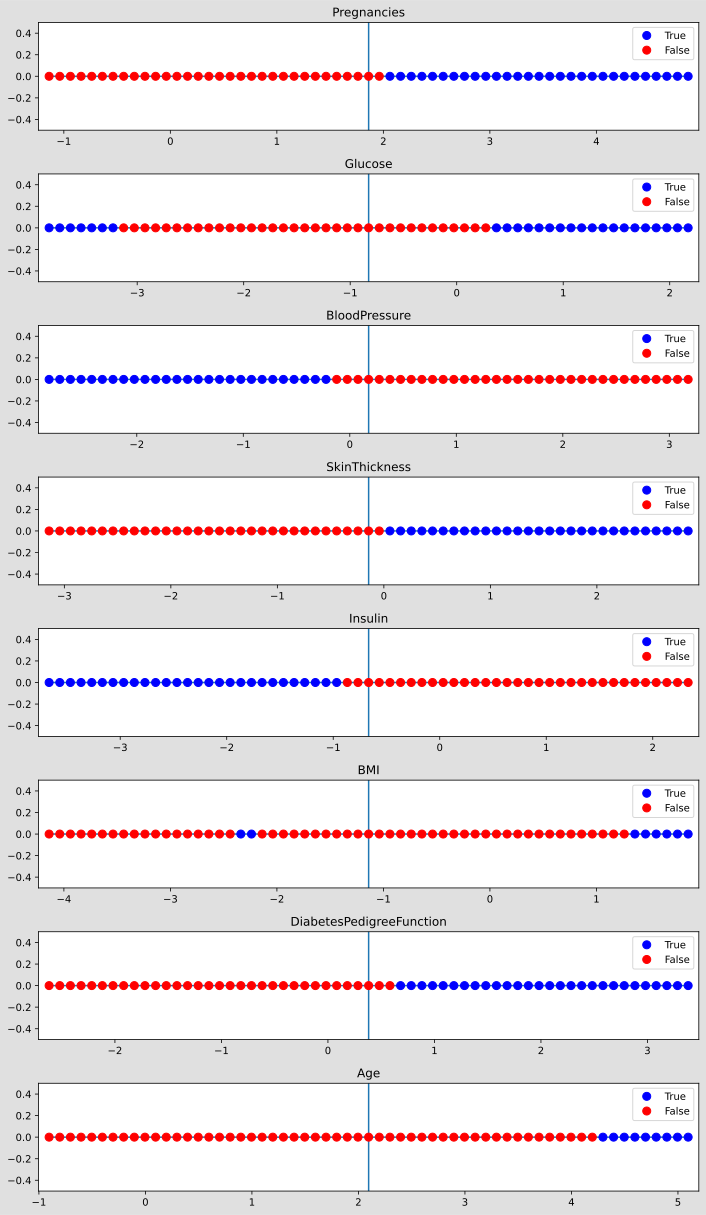

In [16]:
explainer.medical_check_boundary(example_data, variance=0.1, steps = 30)